## Lucía Belmonte Valera

#### El siguiente ejercicio propone un dataset con información de todos los jugadores del videojuego FIFA 2019. El objetivo de este ejercicio es realizar un modelo de clustering y visualizar los resultados.

## ÍNDICE


#### Librerías


#### 1. Análisis exploratorio de los datos
   - 1.1. Dimensiones de las bases de datos
   - 1.2. Detección de valores nulos
   - 1.3. Unión de las dos bases de datos
   - 1.4. Cambio de valores para características categóricas
   - 1.5. Análisis de la dispersión de los datos
   - 1.6. Eliminar algunas de las columnas


#### 2. Selección de características
   - 2.1. Correlaciones entre las características
   - 2.2. Eliminación de las características altamente correlacionadas ( >= 0.7)
   - 2.3 División de la base de datos modificada
   - 2.4. Cálculo de la importancia de las características
   - 2.5. Selección Univariate de las características
   - 2.6. Selección Backward Elimination de las características
 
 
#### 3. Clustering
   - 3.1. Univariate Selection Clustering
   - 3.2. Backward Selection Clustering
   - 3.3. Selección Random Forest Clustering


#### 4. Conclusiones

### Librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

### 1. Análisis exploratorio de los datos

Clustering es una técnica de análisis exploratorio y no supervisado que tiene el objetivo de mostrar las relaciones existentes entre características que no son evidentes pero que sí pueden ser importantes.

Para llevar a cabo esta tarea, primero he explorado los datos disponibles en las dos bases de datos:

- La base de datos 'numeric_data' contiene 42 características, mientras que 'categorical data' contiene 6 características.

- Ambas bases de datos se relacionan por la columna 'ID' y cuentan con información sobre 14.743 jugadores de fútbol.

- Ninguna de las dos bases de datos contiene valores nulos, por lo que no he tenido que 
realizar ninguna tarea de limpieza ni de imputación con respecto a este tipo de valores.


He unido las dos bases de datos con el objetivo de enriquecer los resultados:

- He convertido las características “Preferred Foot” y “Work Rate” en variables numéricas para que pudieran ser analizas, a la misma vez que he eliminado las características “ID”, “Name”, “Nationality” y “Club”, ya contenían una gran cantidad de valores categóricos distintos que podrían dificultar la asignación de valores numéricos.

- También he querido analizar la dispersión de los datos y he podido comprobar que algunas de las características tienen la presencia de grupos, como la variable 'International Reputation, que indica que la mayoría de los jugadores representados tiene reputación internacional', o la variable 'Salaries', que indica que la mayoría de jugadores tienen sueldos altos.



In [2]:
numeric_data = pd.read_csv("numeric_data.csv", sep=",")

categorical_data = pd.read_csv("categorical_data.csv", sep=",")

In [3]:
numeric_data.head()

,ID,Age,Overall,Potential,Wage,Special,International Reputation,Weight,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,31,94,94,565000000.0,2202,5.0,159,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,33,94,94,405000000.0,2228,5.0,183,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,26,92,93,290000000.0,2143,5.0,150,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,192985,27,91,92,355000000.0,2281,4.0,154,93.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
4,183277,27,91,91,340000000.0,2142,4.0,163,81.0,84.0,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


In [4]:
categorical_data.head()

,ID,Name,Nationality,Club,Preferred Foot,Work Rate
0,158023,L. Messi,Argentina,FC Barcelona,Left,Medium/ Medium
1,20801,Cristiano Ronaldo,Portugal,Juventus,Right,High/ Low
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,Right,High/ Medium
3,192985,K. De Bruyne,Belgium,Manchester City,Right,High/ High
4,183277,E. Hazard,Belgium,Chelsea,Right,High/ Medium


#### 1.1. Dimensiones de las bases de datos

In [5]:
numeric_data.shape

(14743, 42)

In [6]:
categorical_data.shape

(14743, 6)

#### 1.2. Detección de valores nulos

In [7]:
missing_values_numeric_data = (numeric_data.isnull().sum())

missing_values_numeric_data

ID                          0
Age                         0
Overall                     0
Potential                   0
Wage                        0
Special                     0
International Reputation    0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positioning                 0
Vision                      0
Penalties                   0
Composure 

In [8]:
missing_values_categorical_data = (categorical_data.isnull().sum())

missing_values_categorical_data

ID                0
Name              0
Nationality       0
Club              0
Preferred Foot    0
Work Rate         0
dtype: int64

#### 1.3. Unión de las dos bases de datos

In [9]:
full_dataset = pd.merge(numeric_data, categorical_data, on='ID', how='left')

In [10]:
full_dataset

,ID,Age,Overall,Potential,Wage,Special,International Reputation,Weight,Crossing,Finishing,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Name,Nationality,Club,Preferred Foot,Work Rate
0,158023,31,94,94,565000000.0,2202,5.0,159,84.0,95.0,...,6.0,11.0,15.0,14.0,8.0,L. Messi,Argentina,FC Barcelona,Left,Medium/ Medium
1,20801,33,94,94,405000000.0,2228,5.0,183,84.0,94.0,...,7.0,11.0,15.0,14.0,11.0,Cristiano Ronaldo,Portugal,Juventus,Right,High/ Low
2,190871,26,92,93,290000000.0,2143,5.0,150,79.0,87.0,...,9.0,9.0,15.0,15.0,11.0,Neymar Jr,Brazil,Paris Saint-Germain,Right,High/ Medium
3,192985,27,91,92,355000000.0,2281,4.0,154,93.0,82.0,...,15.0,13.0,5.0,10.0,13.0,K. De Bruyne,Belgium,Manchester City,Right,High/ High
4,183277,27,91,91,340000000.0,2142,4.0,163,81.0,84.0,...,11.0,12.0,6.0,8.0,8.0,E. Hazard,Belgium,Chelsea,Right,High/ Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,238813,19,47,65,1000000.0,1307,1.0,134,34.0,38.0,...,10.0,13.0,7.0,8.0,9.0,J. Lundstram,England,Crewe Alexandra,Right,Medium/ Medium
14739,243165,19,47,63,1000000.0,1098,1.0,170,23.0,52.0,...,10.0,9.0,9.0,5.0,12.0,N. Christoffersson,Sweden,Trelleborgs FF,Right,Medium/ Medium
14740,241638,16,47,67,1000000.0,1189,1.0,148,25.0,40.0,...,6.0,5.0,10.0,6.0,13.0,B. Worman,England,Cambridge United,Right,Medium/ Medium
14741,246268,17,47,66,1000000.0,1228,1.0,154,44.0,50.0,...,14.0,6.0,14.0,8.0,9.0,D. Walker-Rice,England,Tranmere Rovers,Right,Medium/ Medium


In [11]:
full_dataset["Nationality"].value_counts()

England      1320
Germany       993
Spain         866
France        757
Argentina     741
             ... 
Nicaragua       1
Liberia         1
Grenada         1
Ethiopia        1
Mauritius       1
Name: Nationality, Length: 160, dtype: int64

In [12]:
full_dataset["Club"].value_counts()

West Ham United      30
Liverpool            30
Atlético Madrid      30
Arsenal              30
Manchester United    30
                     ..
Benevento            16
Derry City           15
Carlisle United      15
Perugia              14
Sangju Sangmu FC     12
Name: Club, Length: 651, dtype: int64

In [13]:
full_dataset["Preferred Foot"].value_counts()

Right    11116
Left      3627
Name: Preferred Foot, dtype: int64

In [14]:
full_dataset["Work Rate"].value_counts()

Medium/ Medium    7119
High/ Medium      2886
Medium/ High      1572
High/ High         931
Medium/ Low        769
High/ Low          621
Low/ Medium        413
Low/ High          404
Low/ Low            28
Name: Work Rate, dtype: int64

#### 1.4. Cambio de valores para características categóricas

In [15]:
cleanup_nums = {"Preferred Foot":     {"Right": 1, "Left": 2},
                "Work Rate": {"Medium/ Medium": 1, "High/ Medium": 2, "Medium/ High": 3, "High/ High": 4,
                                  "Medium/ Low": 5, "High/ Low": 6, "Low/ Medium": 7, "Low/ High": 8, "Low/ Low": 9 }}

In [16]:
full_dataset.replace(cleanup_nums, inplace=True)
full_dataset.head()

,ID,Age,Overall,Potential,Wage,Special,International Reputation,Weight,Crossing,Finishing,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Name,Nationality,Club,Preferred Foot,Work Rate
0,158023,31,94,94,565000000.0,2202,5.0,159,84.0,95.0,...,6.0,11.0,15.0,14.0,8.0,L. Messi,Argentina,FC Barcelona,2,1
1,20801,33,94,94,405000000.0,2228,5.0,183,84.0,94.0,...,7.0,11.0,15.0,14.0,11.0,Cristiano Ronaldo,Portugal,Juventus,1,6
2,190871,26,92,93,290000000.0,2143,5.0,150,79.0,87.0,...,9.0,9.0,15.0,15.0,11.0,Neymar Jr,Brazil,Paris Saint-Germain,1,2
3,192985,27,91,92,355000000.0,2281,4.0,154,93.0,82.0,...,15.0,13.0,5.0,10.0,13.0,K. De Bruyne,Belgium,Manchester City,1,4
4,183277,27,91,91,340000000.0,2142,4.0,163,81.0,84.0,...,11.0,12.0,6.0,8.0,8.0,E. Hazard,Belgium,Chelsea,1,2


#### 1.5. Análisis de la dispersión de los datos

/Users/luciabelmonte/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


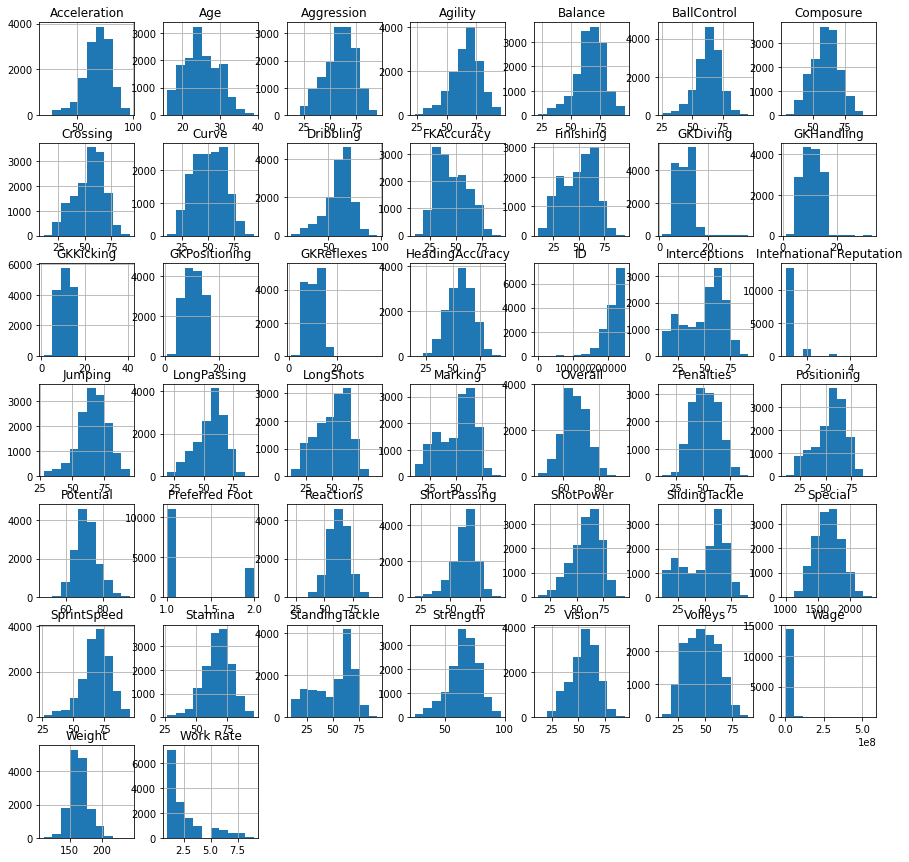

In [17]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
full_dataset.hist(ax=ax)
plt.show()

#### 1.6. Eliminar algunas de las columnas

In [18]:
working_dataset = full_dataset.drop(columns=['ID', 'Name', 'Nationality', 'Club'])

In [19]:
working_dataset

,Age,Overall,Potential,Wage,Special,International Reputation,Weight,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Preferred Foot,Work Rate
0,31,94,94,565000000.0,2202,5.0,159,84.0,95.0,70.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2,1
1,33,94,94,405000000.0,2228,5.0,183,84.0,94.0,89.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,6
2,26,92,93,290000000.0,2143,5.0,150,79.0,87.0,62.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,2
3,27,91,92,355000000.0,2281,4.0,154,93.0,82.0,55.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,4
4,27,91,91,340000000.0,2142,4.0,163,81.0,84.0,61.0,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,19,47,65,1000000.0,1307,1.0,134,34.0,38.0,40.0,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,1,1
14739,19,47,63,1000000.0,1098,1.0,170,23.0,52.0,52.0,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,1,1
14740,16,47,67,1000000.0,1189,1.0,148,25.0,40.0,46.0,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,1,1
14741,17,47,66,1000000.0,1228,1.0,154,44.0,50.0,39.0,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,1,1


### 2. Selección de características

Para la selección de características, he realizado los siguientes pasos:

-	Tras el primer análisis exploratorio de la información, he procedido a calcular las correlaciones existentes entre las características, resultando en la existencia de una gran cantidad, por lo que he procedido a eliminar aquellas en las que la correlación fuera igual o mayor de 0.7.


-	He dividido la base de datos resultante para poder aplicar algoritmos que me pudieran ayudar a determinar la importancia de las características restantes: Linear Regression, Logistic Regression, Random Forest Regressor, Random Forest Classifier, Univariate Selection y Backward Elimination.


#### 2.1. Correlaciones entre las características

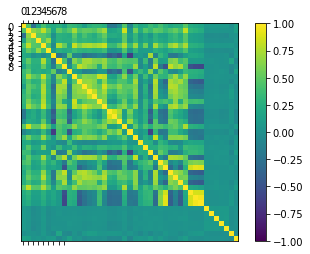

In [20]:
correlations = working_dataset.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()


#### 2.2. Eliminación de las características altamente correlacionadas ( >= 0.7)

In [21]:
columns = np.full((correlations.shape[0],), True, dtype=bool)
for i in range(correlations.shape[0]):
    for j in range(i+1, correlations.shape[0]):
        if correlations.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = working_dataset.columns[columns]
data = working_dataset[selected_columns]

#### 2.3 División de la base de datos modificada

In [22]:
data

,Age,Overall,Potential,Wage,International Reputation,Weight,Finishing,HeadingAccuracy,Acceleration,Jumping,Stamina,Aggression,Interceptions,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Preferred Foot,Work Rate
0,31,94,94,565000000.0,5.0,159,95.0,70.0,91.0,68.0,72.0,48.0,22.0,6.0,11.0,15.0,14.0,8.0,2,1
1,33,94,94,405000000.0,5.0,183,94.0,89.0,89.0,95.0,88.0,63.0,29.0,7.0,11.0,15.0,14.0,11.0,1,6
2,26,92,93,290000000.0,5.0,150,87.0,62.0,94.0,61.0,81.0,56.0,36.0,9.0,9.0,15.0,15.0,11.0,1,2
3,27,91,92,355000000.0,4.0,154,82.0,55.0,78.0,63.0,90.0,76.0,61.0,15.0,13.0,5.0,10.0,13.0,1,4
4,27,91,91,340000000.0,4.0,163,84.0,61.0,94.0,56.0,83.0,54.0,41.0,11.0,12.0,6.0,8.0,8.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,19,47,65,1000000.0,1.0,134,38.0,40.0,54.0,55.0,40.0,46.0,46.0,10.0,13.0,7.0,8.0,9.0,1,1
14739,19,47,63,1000000.0,1.0,170,52.0,52.0,41.0,47.0,43.0,47.0,16.0,10.0,9.0,9.0,5.0,12.0,1,1
14740,16,47,67,1000000.0,1.0,148,40.0,46.0,70.0,60.0,55.0,32.0,15.0,6.0,5.0,10.0,6.0,13.0,1,1
14741,17,47,66,1000000.0,1.0,154,50.0,39.0,61.0,42.0,40.0,33.0,22.0,14.0,6.0,14.0,8.0,9.0,1,1


In [23]:
X = data.iloc[:,0:19]
y = data.iloc[:,19]

#### 2.4. Cálculo de la importancia de las características

Feature: 0, Score: 0.04590
Feature: 1, Score: 0.03728
Feature: 2, Score: 0.00815
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.01042
Feature: 5, Score: 0.00144
Feature: 6, Score: -0.01231
Feature: 7, Score: 0.00808
Feature: 8, Score: -0.00978
Feature: 9, Score: 0.00335
Feature: 10, Score: 0.00473
Feature: 11, Score: 0.00182
Feature: 12, Score: -0.01727
Feature: 13, Score: 0.00503
Feature: 14, Score: -0.00204
Feature: 15, Score: 0.00030
Feature: 16, Score: 0.00433
Feature: 17, Score: -0.00455
Feature: 18, Score: -0.11270


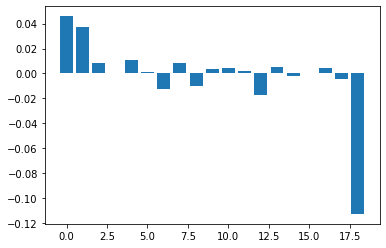

In [24]:
model = LinearRegression()

model.fit(X, y)

importance = model.coef_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000


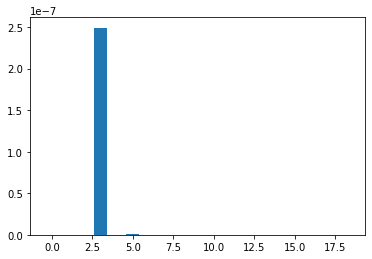

In [25]:
model = LogisticRegression()

model.fit(X, y)

importance = model.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.05150
Feature: 1, Score: 0.04430
Feature: 2, Score: 0.04697
Feature: 3, Score: 0.04102
Feature: 4, Score: 0.00353
Feature: 5, Score: 0.06077
Feature: 6, Score: 0.07484
Feature: 7, Score: 0.07560
Feature: 8, Score: 0.07653
Feature: 9, Score: 0.06846
Feature: 10, Score: 0.07466
Feature: 11, Score: 0.07478
Feature: 12, Score: 0.06804
Feature: 13, Score: 0.04696
Feature: 14, Score: 0.04557
Feature: 15, Score: 0.04712
Feature: 16, Score: 0.04650
Feature: 17, Score: 0.04493
Feature: 18, Score: 0.00791


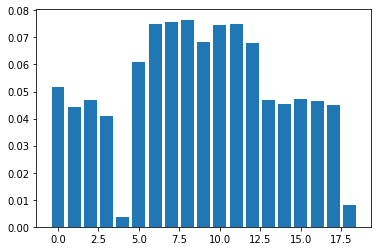

In [26]:
model = RandomForestRegressor()

model.fit(X, y)

importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.05021
Feature: 1, Score: 0.05194
Feature: 2, Score: 0.04944
Feature: 3, Score: 0.04488
Feature: 4, Score: 0.00515
Feature: 5, Score: 0.05614
Feature: 6, Score: 0.07405
Feature: 7, Score: 0.06084
Feature: 8, Score: 0.08282
Feature: 9, Score: 0.06251
Feature: 10, Score: 0.07673
Feature: 11, Score: 0.07259
Feature: 12, Score: 0.06965
Feature: 13, Score: 0.04741
Feature: 14, Score: 0.04614
Feature: 15, Score: 0.04618
Feature: 16, Score: 0.04658
Feature: 17, Score: 0.04583
Feature: 18, Score: 0.01090


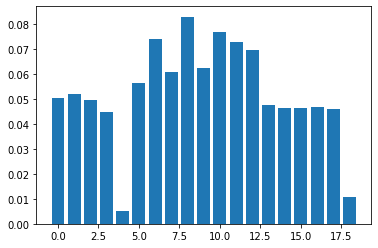

In [27]:
model = RandomForestClassifier()

model.fit(X, y)

importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### 2.5. Selección Univariate de las características

In [28]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


              Specs         Score
3              Wage  2.317436e+10
12    Interceptions  2.025041e+04
6         Finishing  1.722768e+04
11       Aggression  7.135589e+03
8      Acceleration  5.248879e+03
10          Stamina  3.462718e+03
7   HeadingAccuracy  1.749384e+03
9           Jumping  8.722423e+02
5            Weight  8.283208e+02
1           Overall  8.181342e+02


#### 2.6. Selección Backward Elimination de las características

In [29]:
X_1 = sm.add_constant(X)

model = sm.OLS(y,X_1).fit()
model.pvalues

const                       2.551434e-02
Age                         4.363794e-10
Overall                     1.032876e-07
Potential                   1.922307e-01
Wage                        2.767080e-01
International Reputation    8.482278e-01
Weight                      2.664886e-01
Finishing                   1.320282e-16
HeadingAccuracy             3.239976e-05
Acceleration                1.098849e-07
Jumping                     2.684047e-02
Stamina                     7.878007e-03
Aggression                  2.621124e-01
Interceptions               1.002082e-32
GKDiving                    3.144449e-01
GKHandling                  6.859572e-01
GKKicking                   9.509217e-01
GKPositioning               3.911070e-01
GKReflexes                  3.633950e-01
Preferred Foot              1.691220e-03
dtype: float64

In [30]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Age', 'Overall', 'Finishing', 'HeadingAccuracy', 'Acceleration', 'Jumping', 'Stamina', 'Interceptions', 'Preferred Foot']


### 3. Clustering

Para realizar el Clustering, he utilizado las distintas variables que he obtenido en la selección de características anterior y he escogido los resultados de los siguientes métodos para aplicarlos utilizando el algoritmo K-Means: Univariate Selection, Backward Selection y Random Forest.

-	Para seleccionar el número ideal de clusters, he utilizado la fórmula WCSS (Within-Cluster Sum of Square).

-	7 clusters en Univariate Selection.

-	12 clusters en Backward Selection.

-	7 clusters en Random Forest.


#### 3.1. Univariate Selection Clustering

In [31]:
univariate_selection = data[['Wage', 'Interceptions', 'Finishing', 'Aggression', 'Acceleration', 'Stamina', 'HeadingAccuracy', 'Jumping', 'Weight', 'Overall']].copy()

In [32]:
data1 = univariate_selection.values[:, 0:35]

In [33]:
kmean=KMeans(n_clusters=3)
kmean.fit(data1)

KMeans(n_clusters=3)

In [34]:
kmean.cluster_centers_

array([[5.19478119e+06, 4.97661886e+01, 4.85260201e+01, 5.88571112e+01,
        6.74877292e+01, 6.67575399e+01, 5.62089740e+01, 6.57352158e+01,
        1.63759240e+02, 6.53349349e+01],
       [1.89314516e+08, 6.33629032e+01, 6.99274194e+01, 7.07419355e+01,
        7.53467742e+01, 7.91451613e+01, 6.85000000e+01, 7.20725806e+01,
        1.67346774e+02, 8.53225806e+01],
       [4.90760770e+07, 5.99569203e+01, 5.99963336e+01, 6.93235564e+01,
        7.12923923e+01, 7.38560953e+01, 6.53538038e+01, 6.97442713e+01,
        1.67983501e+02, 7.72098992e+01]])

In [35]:
kmean.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

Cluster 1 Inertia 7.686610708292248e+18
Cluster 2 Inertia 3.209281402121701e+18
Cluster 3 Inertia 1.7211706818854566e+18
Cluster 4 Inertia 9.949460169919427e+17
Cluster 5 Inertia 6.53401252913274e+17
Cluster 6 Inertia 4.3542078896700115e+17
Cluster 7 Inertia 3.450074796561181e+17
Cluster 8 Inertia 2.745474338949726e+17
Cluster 9 Inertia 2.095472268693447e+17
Cluster 10 Inertia 1.7294768971815773e+17
Cluster 11 Inertia 1.4573176491238698e+17
Cluster 12 Inertia 1.2114442144287179e+17
Cluster 13 Inertia 1.0192482045666595e+17
Cluster 14 Inertia 8.647452362043294e+16
Cluster 15 Inertia 7.50253972081019e+16
Cluster 16 Inertia 6.5818091533851656e+16
Cluster 17 Inertia 5.7523039597384584e+16
Cluster 18 Inertia 5.061664439513079e+16
Cluster 19 Inertia 4.422605248769129e+16


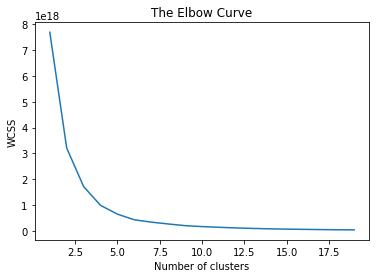

In [36]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
    print('Cluster', i, 'Inertia', kmeans.inertia_)
    
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

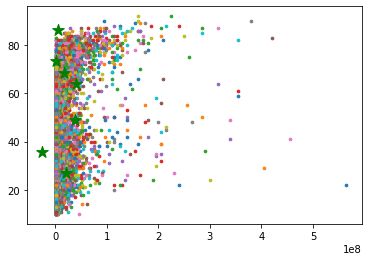

In [37]:
# Number of clusters
k = 7
# Number of training data
n = data1.shape[0]
# Number of features in the data
c = data1.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data1, axis = 0)
std = np.std(data1, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
for i in range(n):
    plt.scatter(data1[i, 0], data1[i,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

plt.show()

#### 3.2. Backward Selection Clustering

In [38]:
backward_selection = data[['Age', 'Overall', 'Finishing', 'HeadingAccuracy', 'Acceleration', 'Jumping', 'Stamina', 'Interceptions', 'Preferred Foot']].copy()

In [39]:
data2 = backward_selection.values[:, 0:35]

In [40]:
kmean=KMeans(n_clusters=3)
kmean.fit(data2)

KMeans(n_clusters=3)

In [41]:
kmean.cluster_centers_

array([[24.56435233, 63.65989637, 30.93284974, 58.98362694, 60.24974093,
        66.70445596, 63.9438342 , 60.9065285 ,  1.25160622],
       [24.19012486, 65.51248581, 62.35414302, 53.73893303, 72.56583428,
        62.93208475, 63.0476731 , 28.90597806,  1.21660991],
       [26.74114853, 70.20919689, 54.3462867 , 58.62046632, 70.33873057,
        69.03842832, 75.92573402, 64.73143351,  1.27374784]])

In [42]:
kmean.labels_

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

Cluster 1 Inertia 18007291.68093323
Cluster 2 Inertia 12106943.86416955
Cluster 3 Inertia 10209103.578645833
Cluster 4 Inertia 9046369.461029492
Cluster 5 Inertia 8249046.419482061
Cluster 6 Inertia 7709870.527652702
Cluster 7 Inertia 7289110.908148991
Cluster 8 Inertia 6923462.984502861
Cluster 9 Inertia 6632572.525461176
Cluster 10 Inertia 6364530.13739766
Cluster 11 Inertia 6156228.847768099
Cluster 12 Inertia 5984959.5140794
Cluster 13 Inertia 5827425.379356918
Cluster 14 Inertia 5685221.411681267
Cluster 15 Inertia 5542786.91572244
Cluster 16 Inertia 5413111.798839618
Cluster 17 Inertia 5293458.208889355
Cluster 18 Inertia 5193901.426626301
Cluster 19 Inertia 5089318.806549372


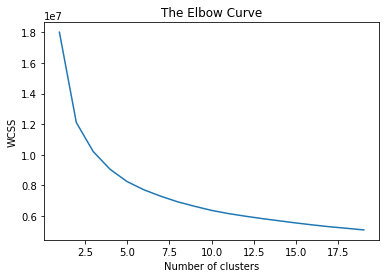

In [43]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)
    print('Cluster', i, 'Inertia', kmeans.inertia_)
    
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

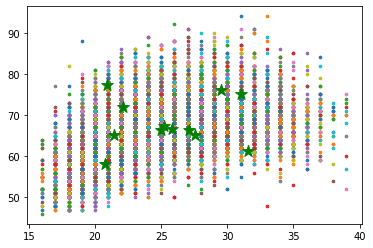

In [44]:
# Number of clusters
k = 12
# Number of training data
n = data2.shape[0]
# Number of features in the data
c = data2.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data2, axis = 0)
std = np.std(data2, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
for i in range(n):
    plt.scatter(data2[i, 0], data2[i,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

plt.show()

#### 3.3. Selección Random Forest Clustering

In [45]:
random_forest = data[['Age', 'Overall', 'Potential', 'Wage', 'Weight', 'Finishing', 'HeadingAccuracy', 'Acceleration', 'Jumping', 'Stamina', 'Aggression', 'Interceptions', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Preferred Foot']].copy()

In [46]:
data3 = random_forest.values[:, 0:35]

In [47]:
kmean=KMeans(n_clusters=3)
kmean.fit(data3)

KMeans(n_clusters=3)

In [48]:
kmean.cluster_centers_

array([[2.49591987e+01, 6.53728826e+01, 7.05679040e+01, 5.27875976e+06,
        1.63766240e+02, 4.85640742e+01, 5.62261747e+01, 6.75054500e+01,
        6.57428929e+01, 6.67870820e+01, 5.88838562e+01, 4.98028428e+01,
        1.04938135e+01, 1.05531006e+01, 1.05601709e+01, 1.05369716e+01,
        1.05092797e+01, 1.24679629e+00],
       [2.68411037e+01, 7.73235014e+01, 7.95366318e+01, 5.07535680e+07,
        1.68093245e+02, 6.01294006e+01, 6.55413892e+01, 7.12407231e+01,
        6.97830637e+01, 7.38715509e+01, 6.95670790e+01, 6.00999049e+01,
        1.06793530e+01, 1.06983825e+01, 1.05984776e+01, 1.04804948e+01,
        1.05176023e+01, 1.23120837e+00],
       [2.76403509e+01, 8.56754386e+01, 8.70701754e+01, 1.95394737e+08,
        1.67298246e+02, 7.00701754e+01, 6.90087719e+01, 7.57368421e+01,
        7.27631579e+01, 7.90614035e+01, 7.00263158e+01, 6.24473684e+01,
        1.00701754e+01, 1.00438596e+01, 1.02543860e+01, 1.00000000e+01,
        1.01140351e+01, 1.28947368e+00]])

In [49]:
kmean.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

Cluster 1 Inertia 7.686610708293841e+18
Cluster 2 Inertia 3.2092814021232067e+18
Cluster 3 Inertia 1.7211706818868928e+18
Cluster 4 Inertia 9.949460169933624e+17
Cluster 5 Inertia 6.534012529146678e+17
Cluster 6 Inertia 4.354207889683912e+17
Cluster 7 Inertia 3.450074796574924e+17
Cluster 8 Inertia 2.745474338963226e+17
Cluster 9 Inertia 2.0954722687070218e+17
Cluster 10 Inertia 1.729476897195163e+17
Cluster 11 Inertia 1.4573176491374592e+17
Cluster 12 Inertia 1.2114442144420933e+17
Cluster 13 Inertia 1.0192482045800872e+17
Cluster 14 Inertia 8.647452362177008e+16
Cluster 15 Inertia 7.502539720943749e+16
Cluster 16 Inertia 6.581809153518766e+16
Cluster 17 Inertia 5.7523039598720056e+16
Cluster 18 Inertia 5.061664439646263e+16
Cluster 19 Inertia 4.422605248901979e+16


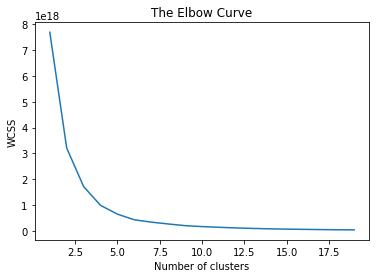

In [50]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data3)
    wcss.append(kmeans.inertia_)
    print('Cluster', i, 'Inertia', kmeans.inertia_)
    
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

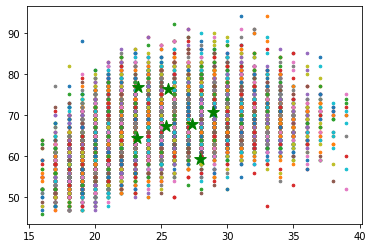

In [51]:
# Number of clusters
k = 7
# Number of training data
n = data3.shape[0]
# Number of features in the data
c = data3.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data3, axis = 0)
std = np.std(data3, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
for i in range(n):
    plt.scatter(data3[i, 0], data3[i,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

plt.show()

### 4. Conclusiones

En mi opinión, la clave para que el Clustering funcione correctamente se encuentra en la selección de las características que se incluyan en el modelo de Machine Learning, ya que con ello se evita que haya características redundantes, irrelevantes o correlacionadas entre ellas, así como mejorar la eficiencia del modelo.

En este caso, no he podido conseguir una diferenciación clara de clusters. Quizás el modelo más cercano ha podido ser el que he realizado usando Univariate Selection, pero en este caso tampoco se ve una clara diferenciación entre clusters.